# MACHO-OGLE-SIMBAD Distributions
- I haven't gotten to putting SIMBAD on here yet
- OGLE sample is from the OGLE-III Catalog of Variable Stars, specifically the AGBs from the LMC
- MACHO sample is from the MACHO LPVs seen in Vizier, again from the LMC

In [1]:
from thesiscode.plotting import Plot
from thesiscode.quality import Data, read_gator_2mass_matched, match_data, read_vizier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import itertools

In [2]:
font = {'family' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
matplotlib.rcParams["ps.useafm"] = True
matplotlib.rcParams["pdf.use14corefonts"] = True
matplotlib.rcParams["text.usetex"] = True


In [3]:
def three_cell_plot(x1, x2, x3, y1, y2, y3, xlabel=None, xlims=None, ylabel=None, ylims=None, txt1=None, txt2=None, txt3=None, inverted=False):
    colors = ["b","r","g","y","purple","orange","black"]
    
    fig = plt.figure(figsize=(6,6))
    fig.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.1, wspace=0, hspace=0)

    ax = plt.subplot(221)
    for ii in range(len(x1)):
        ax.scatter(x1[ii], y1[ii], c=colors[ii], s=1, edgecolor="None")
    if txt1:
        ax.text(0.9, 0.9, txt1, transform=ax.transAxes, horizontalalignment="right")
    ax.set_xlim(xlims[0], xlims[1])
    ax.set_ylim(ylims[0], ylims[1])
    ax.set_ylabel(ylabel)
    if inverted:
        ax.invert_yaxis()
    ax.get_xaxis().set_visible(False)
    ax.minorticks_on()

    ax = plt.subplot(223)
    for ii in range(len(x2)):
        ax.scatter(x2[ii], y2[ii], c=colors[ii], s=1, edgecolor="None")
    if txt2:
        ax.text(0.9, 0.9, txt2, transform=ax.transAxes, horizontalalignment="right")
    ax.set_xlim(xlims[0], xlims[1])
    ax.set_ylim(ylims[0], ylims[1])
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if inverted:
        ax.invert_yaxis()
    ax.minorticks_on()

    ax = plt.subplot(224)
    for ii in range(len(x3)):
        ax.scatter(x3[ii], y3[ii], c=colors[ii], s=1, edgecolor="None")
    if txt3:
        ax.text(0.9, 0.9, txt3, transform=ax.transAxes, horizontalalignment="right")
    ax.set_xlim(xlims[0], xlims[1])
    ax.set_ylim(ylims[0], ylims[1])
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.get_yaxis().set_visible(False)
    if inverted:
        ax.invert_yaxis()
    ax.minorticks_on()
    plt.show()

In [4]:
## Match OGLE and 2MASS
ogle = pd.read_csv("../samples/ogle_table.dat", sep="|")
ogle_2mass = read_gator_2mass_matched("../samples/ogle_2mass_match.tbl", "2mass")
ogle_matched = Data(match_data(ogle, ogle_2mass))
ogle_matched.data["colvi"] = ogle_matched.data.V - ogle_matched.data.I

ogle_matched.data.Field[ogle_matched.data.glon > 290] = "smc"
ogle_matched.data.Field[ogle_matched.data.glon < 290] = "lmc"
lmc = ogle_matched.data.Field == "lmc"

ogle_matched.cut_me(lmc, cutstr="Selecting only LMC objects")
ogle_matched.cut_me(ogle_matched.data.I > 12.5, cutstr="Enforcing OGLE saturation")

## Match OGLE and WISE-2MASS
ogle_wise = pd.read_csv("../samples/ogle_allwise_allmatches.dat", sep="|")
ogle_wise = Data(ogle_wise)
ogle_wise.data["colvi"] = ogle_wise.data.V - ogle_wise.data.I
ogle_wise.data["coljk"] = ogle_wise.data.jmag - ogle_wise.data.kmag
ogle_wise.data["col12"] = ogle_wise.data.w1 - ogle_wise.data.w2
ogle_wise.data["col23"] = ogle_wise.data.w2 - ogle_wise.data.w3

ogle_wise.data.Field[ogle_wise.data.glon > 290] = "smc"
ogle_wise.data.Field[ogle_wise.data.glon < 290] = "lmc"
lmc = ogle_wise.data.Field == "lmc"

ogle_wise.clean_me(faint=False, saturated=False, ccflag=False, snr=1, extflg=5)
ogle_wise.cut_me(lmc, cutstr="Selecting only LMC objects")
ogle_wise.cut_me(ogle_wise.data.I > 12.5, cutstr="Enforcing OGLE saturation")

/Users/Nick/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Nick/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Nick/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Nick/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:23: SettingWithCopyWarning: 
A v

##Color-color plot for OGLE sources matched to 2MASS
- OGLE (V-I) vs 2MASS (J-K), color coded based on "spectral" identification. 
- Miras, SRVs, and OSARGs separated based on color, magnitude, and period in OGLE

In [5]:
cut1 = (ogle_matched.data.Spectr == "O-rich") & (ogle_matched.data.Type == "OSARG")
cut2 = (ogle_matched.data.Spectr == "C-rich") & (ogle_matched.data.Type == "OSARG")
cut3 = (ogle_matched.data.Spectr == "O-rich") & (ogle_matched.data.Type == "Mira")
cut4 = (ogle_matched.data.Spectr == "C-rich") & (ogle_matched.data.Type == "Mira")
cut5 = (ogle_matched.data.Spectr == "O-rich") & (ogle_matched.data.Type == "SRV")
cut6 = (ogle_matched.data.Spectr == "C-rich") & (ogle_matched.data.Type == "SRV")


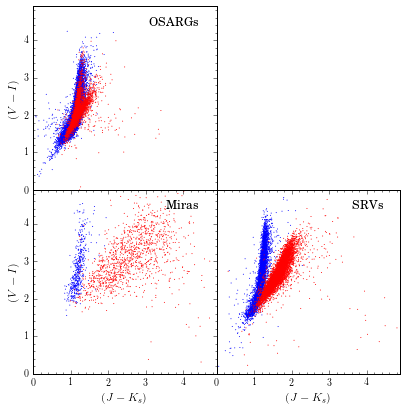

In [6]:
x1 = [ogle_matched.data.coljk[cut1], ogle_matched.data.coljk[cut2]]
x2 = [ogle_matched.data.coljk[cut3], ogle_matched.data.coljk[cut4]]
x3 = [ogle_matched.data.coljk[cut5], ogle_matched.data.coljk[cut6]]

y1 = [ogle_matched.data.colvi[cut1], ogle_matched.data.colvi[cut2]]
y2 = [ogle_matched.data.colvi[cut3], ogle_matched.data.colvi[cut4]]
y3 = [ogle_matched.data.colvi[cut5], ogle_matched.data.colvi[cut6]]

three_cell_plot(x1, x2, x3, y1, y2, y3, xlabel="$(J-K_s)$", ylabel="$(V-I)$", 
                ylims=(0,4.9), xlims=(0,4.9), txt1="OSARGs", txt2="Miras", txt3="SRVs")


## Same Color-color plot for OGLE sources matched to WISE showing clear separation in color-color space
- Neither faint limits nor saturation limits are enforced
- No quality cuts based on contamination/confusion flags
- Signal to noise = 1
- Not cutting on whether or not sources are extended in WISE or 2MASS photometry

In [7]:
cut1 = (ogle_wise.data.Spectr == "O-rich") & (ogle_wise.data.Type == "OSARG")
cut2 = (ogle_wise.data.Spectr == "C-rich") & (ogle_wise.data.Type == "OSARG")
cut3 = (ogle_wise.data.Spectr == "O-rich") & (ogle_wise.data.Type == "Mira")
cut4 = (ogle_wise.data.Spectr == "C-rich") & (ogle_wise.data.Type == "Mira")
cut5 = (ogle_wise.data.Spectr == "O-rich") & (ogle_wise.data.Type == "SRV")
cut6 = (ogle_wise.data.Spectr == "C-rich") & (ogle_wise.data.Type == "SRV")

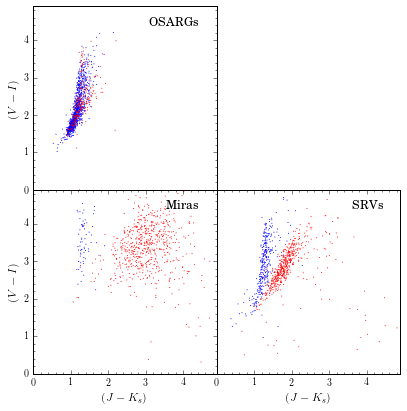

In [8]:
x1 = [ogle_wise.data.coljk[cut1], ogle_wise.data.coljk[cut2]]
x2 = [ogle_wise.data.coljk[cut3], ogle_wise.data.coljk[cut4]]
x3 = [ogle_wise.data.coljk[cut5], ogle_wise.data.coljk[cut6]]

y1 = [ogle_wise.data.colvi[cut1], ogle_wise.data.colvi[cut2]]
y2 = [ogle_wise.data.colvi[cut3], ogle_wise.data.colvi[cut4]]
y3 = [ogle_wise.data.colvi[cut5], ogle_wise.data.colvi[cut6]]

three_cell_plot(x1, x2, x3, y1, y2, y3, xlabel="$(J-K_s)$", ylabel="$(V-I)$", 
                ylims=(0,4.9), xlims=(0,4.9), txt1="OSARGs", txt2="Miras", txt3="SRVs")


## WISE color-color plot for OGLE sources matched to WISE

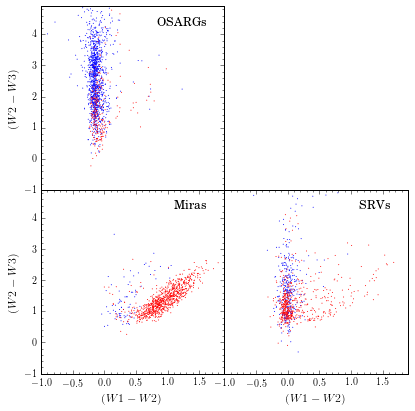

In [9]:
x1 = [ogle_wise.data.col12[cut1], ogle_wise.data.col12[cut2]]
x2 = [ogle_wise.data.col12[cut3], ogle_wise.data.col12[cut4]]
x3 = [ogle_wise.data.col12[cut5], ogle_wise.data.col12[cut6]]

y1 = [ogle_wise.data.col23[cut1], ogle_wise.data.col23[cut2]]
y2 = [ogle_wise.data.col23[cut3], ogle_wise.data.col23[cut4]]
y3 = [ogle_wise.data.col23[cut5], ogle_wise.data.col23[cut6]]

three_cell_plot(x1, x2, x3, y1, y2, y3, xlabel="$(W1-W2)$", ylabel="$(W2-W3)$", 
                ylims=(-1,4.9), xlims=(-1, 1.9), txt1="OSARGs", txt2="Miras", txt3="SRVs")


## WISE W2-W3 vs OGLE V-I 

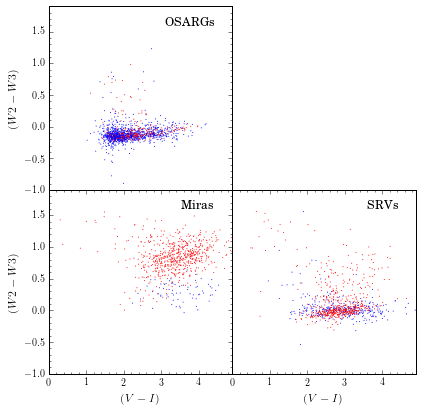

In [10]:
x1 = [ogle_wise.data.colvi[cut1], ogle_wise.data.colvi[cut2]]
x2 = [ogle_wise.data.colvi[cut3], ogle_wise.data.colvi[cut4]]
x3 = [ogle_wise.data.colvi[cut5], ogle_wise.data.colvi[cut6]]

y1 = [ogle_wise.data.col12[cut1], ogle_wise.data.col12[cut2]]
y2 = [ogle_wise.data.col12[cut3], ogle_wise.data.col12[cut4]]
y3 = [ogle_wise.data.col12[cut5], ogle_wise.data.col12[cut6]]

three_cell_plot(x1, x2, x3, y1, y2, y3, xlabel="$(V-I)$", ylabel="$(W2-W3)$", 
                ylims=(-1,1.9), xlims=(0, 4.9), txt1="OSARGs", txt2="Miras", txt3="SRVs")


## WISE color-magnitude diagrams to verify that even without saturation/faint limits, WISE photometry doesn't violate photometry limits

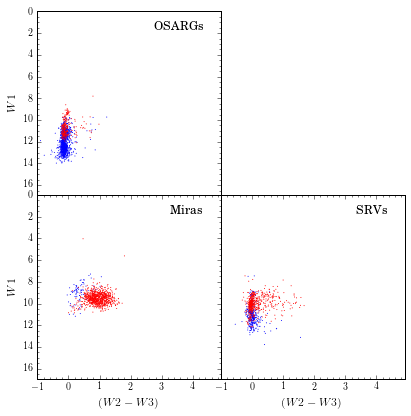

In [11]:
x1 = [ogle_wise.data.col12[cut1], ogle_wise.data.col12[cut2]]
x2 = [ogle_wise.data.col12[cut3], ogle_wise.data.col12[cut4]]
x3 = [ogle_wise.data.col12[cut5], ogle_wise.data.col12[cut6]]

y1 = [ogle_wise.data.w1[cut1], ogle_wise.data.w1[cut2]]
y2 = [ogle_wise.data.w1[cut3], ogle_wise.data.w1[cut4]]
y3 = [ogle_wise.data.w1[cut5], ogle_wise.data.w1[cut6]]

three_cell_plot(x1, x2, x3, y1, y2, y3, xlabel="$(W2-W3)$", ylabel="$W1$", 
                ylims=(0,16.9), xlims=(-1, 4.9), txt1="OSARGs", txt2="Miras", txt3="SRVs", inverted=True)


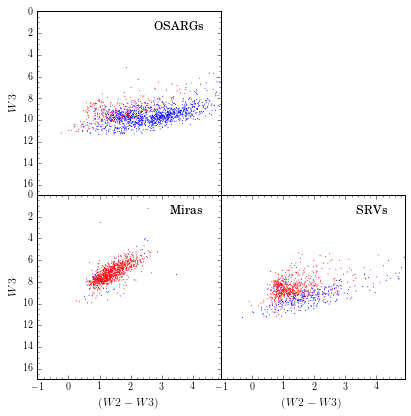

In [12]:
x1 = [ogle_wise.data.col23[cut1], ogle_wise.data.col23[cut2]]
x2 = [ogle_wise.data.col23[cut3], ogle_wise.data.col23[cut4]]
x3 = [ogle_wise.data.col23[cut5], ogle_wise.data.col23[cut6]]

y1 = [ogle_wise.data.w3[cut1], ogle_wise.data.w3[cut2]]
y2 = [ogle_wise.data.w3[cut3], ogle_wise.data.w3[cut4]]
y3 = [ogle_wise.data.w3[cut5], ogle_wise.data.w3[cut6]]

three_cell_plot(x1, x2, x3, y1, y2, y3, xlabel="$(W2-W3)$", ylabel="$W3$", 
                ylims=(0,16.9), xlims=(-1, 4.9), txt1="OSARGs", txt2="Miras", txt3="SRVs", inverted=True)


# Match MACHO and OGLE; verify that our sample is what we think it is: long period variables

In [13]:
macho = pd.read_csv("../samples/macho_table.dat", sep="|")
ogle = pd.read_csv("../samples/ogle_table.dat", sep="|")

## Match within 3"

In [14]:
macho_matches = []
ogle_matches = []
mrad = []

for ii in range(len(macho)):
    ra = macho._RAJ2000[ii]
    decl = macho._DEJ2000[ii]
    distances = np.sqrt((ra - ogle.RA)**2 + (decl - ogle.Decl)**2) * 3600
    if min(distances) < 3.:
        ogle_matches.append(distances.argmin())
        macho_matches.append(ii)
        mrad.append(distances[distances.argmin()])
        

In [15]:
ogle_dummy = ogle.ix[ogle_matches].reset_index(drop=True)
macho_dummy = macho.ix[macho_matches].reset_index(drop=True)

In [16]:
ogle_macho = pd.concat((ogle_dummy, macho_dummy), axis=1)
ogle_macho["mrad"] = mrad

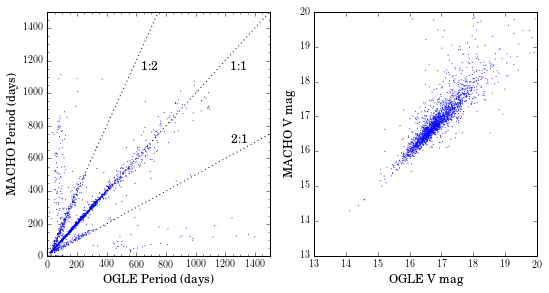

In [17]:
fig = plt.figure(figsize=(8,4))
fig.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.1)

ax = plt.subplot(121)
ax.scatter(ogle_macho.P_1, ogle_macho.rPer, s=1, edgecolor="None", c="b")
ax.plot([0, 1500], [0, 1500], linestyle=":", color="k")
ax.plot([0, 1500], [0, 3000], linestyle=":", color="k")
ax.plot([0, 3000], [0, 1500], linestyle=":", color="k")
ax.text(0.9, 0.8, "1:1", transform = ax.transAxes, horizontalalignment="right", verticalalignment="top")
ax.text(0.5, 0.8, "1:2", transform = ax.transAxes, horizontalalignment="right", verticalalignment="top")
ax.text(0.9, 0.5, "2:1", transform = ax.transAxes, horizontalalignment="right", verticalalignment="top")
ax.minorticks_on()
ax.set_xlim(0, 1500)
ax.set_xlabel("OGLE Period (days)")
ax.set_ylim(0, 1500)
ax.set_ylabel("MACHO Period (days)")

ax = plt.subplot(122)
ax.scatter(ogle_macho.V, ogle_macho.Vmag, s=1, edgecolor="None", c="b")
ax.set_xlabel("OGLE V mag")
ax.set_xlim(13, 20)
ax.set_ylabel("MACHO V mag")
ax.set_ylim(13, 20)
plt.show()

In [18]:
cut1 = (ogle_macho.Spectr == "O-rich") & (ogle_macho.Type == "OSARG")
cut2 = (ogle_macho.Spectr == "C-rich") & (ogle_macho.Type == "OSARG")
cut3 = (ogle_macho.Spectr == "O-rich") & (ogle_macho.Type == "Mira")
cut4 = (ogle_macho.Spectr == "C-rich") & (ogle_macho.Type == "Mira")
cut5 = (ogle_macho.Spectr == "O-rich") & (ogle_macho.Type == "SRV")
cut6 = (ogle_macho.Spectr == "C-rich") & (ogle_macho.Type == "SRV")


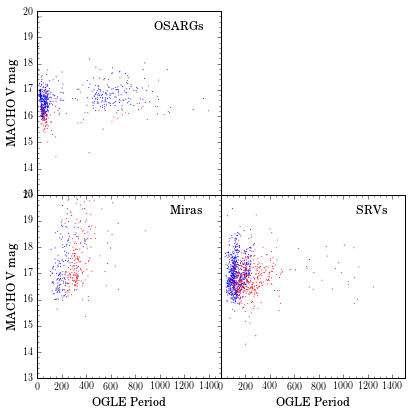

In [19]:
x1 = [ogle_macho.P_1[cut1], ogle_macho.P_1[cut2]]
x2 = [ogle_macho.P_1[cut3], ogle_macho.P_1[cut4]]
x3 = [ogle_macho.P_1[cut5], ogle_macho.P_1[cut6]]

y1 = [ogle_macho.Vmag[cut1], ogle_macho.Vmag[cut2]]
y2 = [ogle_macho.Vmag[cut3], ogle_macho.Vmag[cut4]]
y3 = [ogle_macho.Vmag[cut5], ogle_macho.Vmag[cut6]]

three_cell_plot(x1, x2, x3, y1, y2, y3, xlabel="OGLE Period", ylabel="MACHO V mag", 
                ylims=(13,20), xlims=(0,1500), txt1="OSARGs", txt2="Miras", txt3="SRVs")

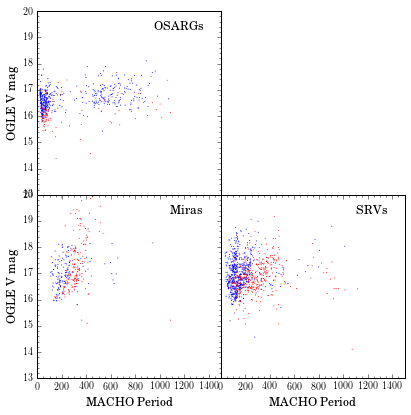

In [20]:
x1 = [ogle_macho.bPer[cut1], ogle_macho.bPer[cut2]]
x2 = [ogle_macho.bPer[cut3], ogle_macho.bPer[cut4]]
x3 = [ogle_macho.bPer[cut5], ogle_macho.bPer[cut6]]

y1 = [ogle_macho.V[cut1], ogle_macho.V[cut2]]
y2 = [ogle_macho.V[cut3], ogle_macho.V[cut4]]
y3 = [ogle_macho.V[cut5], ogle_macho.V[cut6]]

three_cell_plot(x1, x2, x3, y1, y2, y3, xlabel="MACHO Period", ylabel="OGLE V mag", 
                ylims=(13,20), xlims=(0,1500), txt1="OSARGs", txt2="Miras", txt3="SRVs")